# D15 Frequency Response

In [2]:
import numpy as np
import sympy as sm
from sympy import UnevaluatedExpr as uneval
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

# Single link arm Parameter File
from control import tf, bode, frequency_response
import matplotlib.pyplot as plt

# flag to define if using dB or absolute scale for M(omega)
dB_flag = False # don't show things in dB

### Draw by hand the Bode plot of the mass spring damper from force $\tilde F$ to position $\tilde z$. Use the bode command in Matlab or Python and compare your results.

In [3]:
print('From HW D.5, the transfer function for the single link robot arm is:')

kd, kp, ki = sm.symbols(r'k_P k_P k_I', real=True, positive=True)
s = sm.symbols(r's')
m, b, k = sm.symbols(r'm b k', real=True, positive=True)
# tf = 0.2/(s**2 + 0.1*s + 0.6)
P = uneval(1/m) / (s**2 + b/m*s + k/m)
C = (kd*s**2 + kp*s + ki)/s

display(Math(r'H(s) = ' + vlatex(P)))

From HW D.5, the transfer function for the single link robot arm is:


<IPython.core.display.Math object>

In [4]:
# put in bode canonical form
w = sm.symbols(r'\omega', real=True, positive=True)
# tf = tf.subs({s: sm.I*w})

# display(Math(r'H(j\omega)=' + vlatex(tf)))

In [5]:
# Therefore:

# var = 20 * sm.log( (sm.Abs(tf)), 10)
# sm.expand(var)
# var

In [6]:
wn = 0.775
zeta = 0.0645

20 * np.log10(1/2/zeta)

17.78820579401502

Plot the bode plot:

c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  warnings.warn(
c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


Magnitude at 0.3 is 0.3
Magnitude at 10.0 is 10.0
Magnitude at 1000.0 is 1000.0


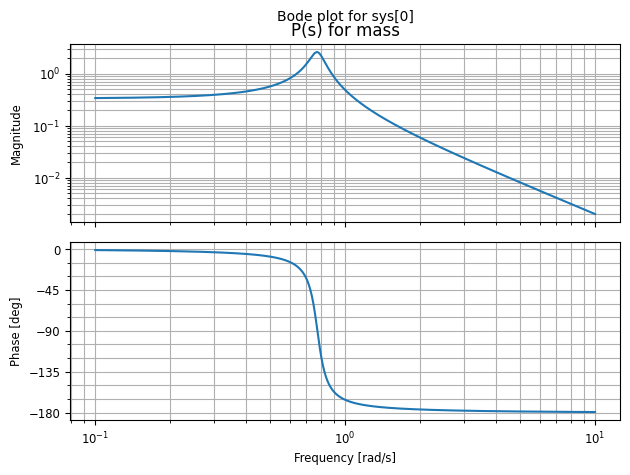

In [7]:
Plant = tf([0.2],
           [1, 0.1, 0.6])

fig=plt.figure()
bode(Plant,dB=dB_flag,margins=False)
fig.axes[0].set_title('P(s) for mass')

# if you want specific values at specific frequencies , you can
# do the following(but the magnitudes are absolute, not dB)
omegas = [0.3, 10.0, 1000.0]
mag, phase, omega=bode(Plant, plot=False, omega=omegas)

print(f'Magnitude at {omegas[0]} is {omega[0]}')
print(f'Magnitude at {omegas[1]} is {omega[1]}')
print(f'Magnitude at {omegas[2]} is {omega[2]}')

plt.show()

# D15

For the mass spring damper, use the ```bode``` command (from Python or Matlab)
to create a graph that simultaneously displays the Bode plots for 
* (1) the plant, and 
* (2) the plant under PID control, 

using the control gains calculated in Homework D.10. Use the dirty derivative when implementing the derivative portion of the PID control.

kp:  21.200000000000006
kd:  15.054
ki:  1.5


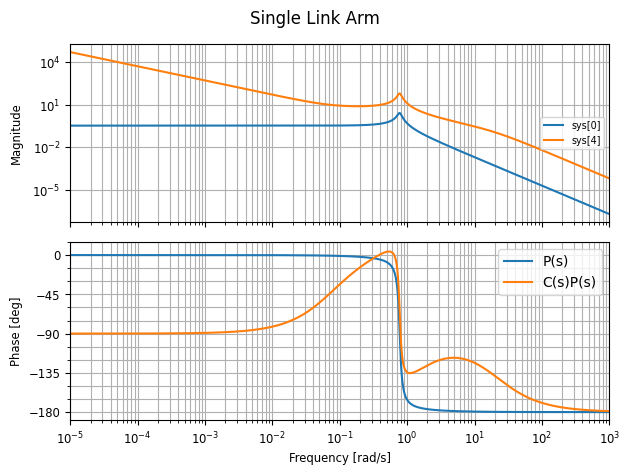

In [8]:
from ctrlPIDhwD10 import ctrlPID

P10 = ctrlPID()

C_pid = tf([(P10.kd+P10.kp*P10.sigma), 
            (P10.kp+P10.ki*P10.sigma), 
            P10.ki],
           [P10.sigma, 1, 0])

fig = plt.figure()
bode([Plant, Plant*C_pid], omega_limits=[10**(-5), 10**(3)], dB=dB_flag)
fig.suptitle('Single Link Arm')
plt.legend(['P(s)', 'C(s)P(s)'])

plt.show()

###  (a) What is the tracking error to a unit ramp under PID control?

evaluate the limit

$$
\lim_{s\rightarrow 0} \frac{1}{1+PC}
$$

In [9]:
display(Math(r'\frac{1}{1+PC}=' + vlatex(1/(1+P*C))))

tracking = sm.limit(s * 1/ (1 + P*C) * 1/s**2, s, 0).doit()

display(Math(r'\lim_{s\rightarrow0} \frac{1}{1+PC}=' + vlatex(tracking)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (b) If the frequency content of the input disturbance $d_{in}(t)$ is below $\omega_{d_{in}} = 0.1$ radians per second, what percentage of the input disturbance shows up in the output $z$ under PID control?

For the input disturbance, the difference between the loop gain and the plant is $B_{d_{in}}=??$

In [10]:
mag_plant, _, _ = bode(Plant, db=False, plot=False, omega=[0.1])
print(f'Magnitude of plant at {0.1} is {mag_plant[0]}')

mag_loop, _, _ = bode(Plant*C_pid, db=False, plot=False, omega=[0.1])
print(f'Magnitude of loop at {0.1} is {mag_loop[0]}')
print(f'Difference is {mag_loop[0] - mag_plant[0]}')

Magnitude of plant at 0.1 is 0.33893437086575373
Magnitude of loop at 0.1 is 8.519764084268083
Difference is 8.180829713402328


c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


Use the relation:

$$
\gamma_{d_{in}} = 10^{-B_{d_{in}}/20}
$$

In [11]:
# convert the difference to dB
diff = 20 * np.log10(mag_loop[0] - mag_plant[0])
print('diff = ', diff)

gamma_din = 10**(-diff/20)
print('gamma = ', gamma_din)
print(f'So, {gamma_din*100:.2f}% of the input disturbance shows up in PID control.')

diff =  18.255947055525322
gamma =  0.12223699001602978
So, 12.22% of the input disturbance shows up in PID control.


### (c) If all of the frequency content of the noise $n(t)$ is greater than $\omega_{no} = 100$ radians per second, what percentage of the noise shows up in the output signal $z$?

In [12]:
w_no = 100

mag_loop, _, _ = bode(Plant*C_pid, db=False, plot=False, omega=[w_no])
print(f'Magnitude of loop at {w_no} is {mag_loop[0]}')

Magnitude of loop at 100 is 0.006321298936591869


In [14]:
# convert the difference to dB
B_n = 20 * np.log10(mag_loop[0])
print('B_n = ', B_n)

gamma_dno = 10**(B_n/20)
print('gamma = ', gamma_dno)
print(f'So, {gamma_dno*100:.2f}% of the input disturbance shows up in PID control.')

B_n =  -43.9838734247611
gamma =  0.006321298936591867
So, 0.63% of the input disturbance shows up in PID control.
